In [ ]:
! pip install tensorflow keras matplotlib scikit-learn umap-learn


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import os
from tensorflow import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

In [27]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [28]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
embedding_model = keras.Sequential()
for layer in model.layers[:-1]:
  embedding_model.add(layer)

In [30]:
embedding_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
import zipfile
path_to_zip_file = "/content/audio.zip"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall()

FileNotFoundError: [Errno 2] No such file or directory: '/content/audio.zip'

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    # Resize and load image
    img = image.load_img(path, target_size=model.input_shape[1:3])
    
    # Convert image to Numpy Array
    img_input = image.img_to_array(img)

    # Add a batch size of 1
    img_input = np.expand_dims(img_input, axis=0)

    # Model specific preprocessing, not relevant for us now
    img_input = preprocess_input(img_input)

    return img, img_input

shape of x:  (1, 224, 224, 3)
data type:  float32


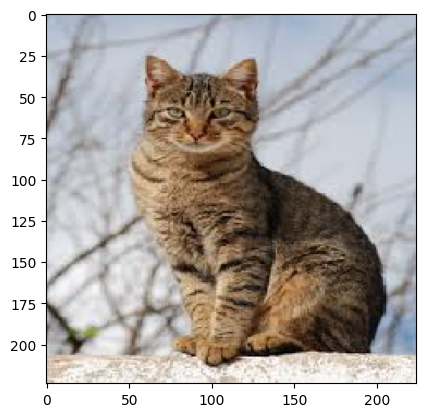

In [ ]:
img, img_input = load_image("images\1_cat_silver.jpg")
print("shape of x: ", img_input.shape)
print("data type: ", img_input.dtype)
plt.imshow(img)

In [34]:
embedding_model.predict(img_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


array([[0.       , 0.       , 3.1012812, ..., 0.       , 0.       ,
        3.2119806]], dtype=float32)

In [35]:
img_dir = "images"
images = os.listdir(img_dir)
print(images)

['cat1.jpg', 'cat2.jpg', 'cat3.jpg', 'cat4.jpg', 'cat5.jpg', 'dog1.jpg', 'dog2.jpg', 'dog3.jpg', 'dog4.jpg', 'dog5.jpg']


In [36]:
embeddings = []
for im in images:
  img_path = os.path.join(img_dir,im)
  img, img_input = load_image(img_path)
  embeddings.append((img_path, embedding_model.predict(img_input)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


In [37]:
print(embeddings)

[('images\\cat1.jpg', array([[0.       , 0.       , 3.1012812, ..., 0.       , 0.       ,
        3.2119806]], dtype=float32)), ('images\\cat2.jpg', array([[2.5988474, 0.       , 0.9876149, ..., 0.       , 0.       ,
        0.       ]], dtype=float32)), ('images\\cat3.jpg', array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)), ('images\\cat4.jpg', array([[0.       , 0.       , 3.3961911, ..., 0.       , 0.       ,
        1.7246943]], dtype=float32)), ('images\\cat5.jpg', array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.9360175]], dtype=float32)), ('images\\dog1.jpg', array([[0.46653706, 0.        , 5.0155463 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)), ('images\\dog2.jpg', array([[0.       , 0.       , 1.2026318, ..., 0.       , 0.       ,
        0.       ]], dtype=float32)), ('images\\dog3.jpg', array([[3.1487598, 0.       , 0.       , ..., 0.9764881, 0.       ,
        0.       ]], dtype=float32)), ('images\\dog4.jpg', array(

In [72]:
def search(path):
  _, img_input = load_image(path)
  query_embedding = embedding_model.predict(img_input)
  cosine_loss = keras.losses.CosineSimilarity(axis=1)
  
  similarity_array = [
    cosine_loss(embedding[1], query_embedding)
    for embedding in embeddings
  ]

  scored_embeddings = [
    (embedding[0], embedding[1], score)
    for embedding, score in zip(embeddings, similarity_array)
  ]

  sorted_embedding = sorted(scored_embeddings, key = lambda x: x[2])
  return sorted_embedding

In [73]:
search_result = search("images/dog5.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


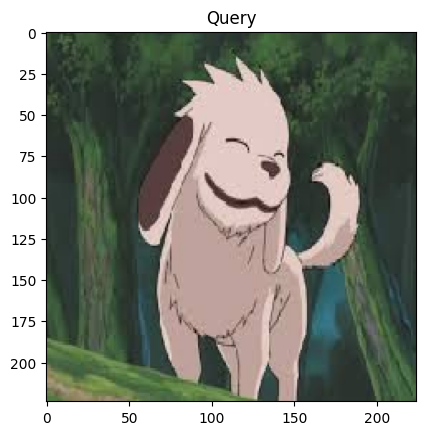

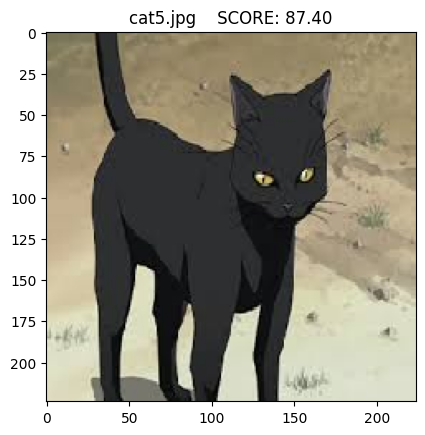

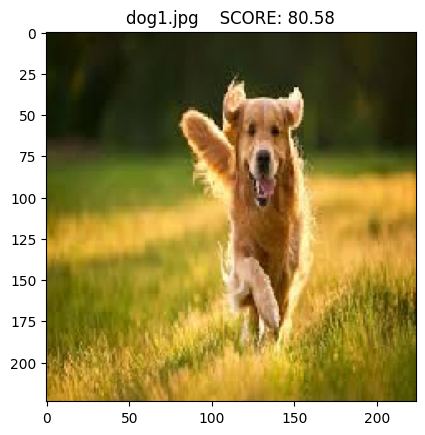

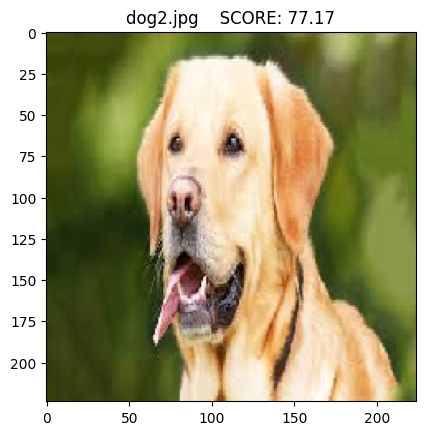

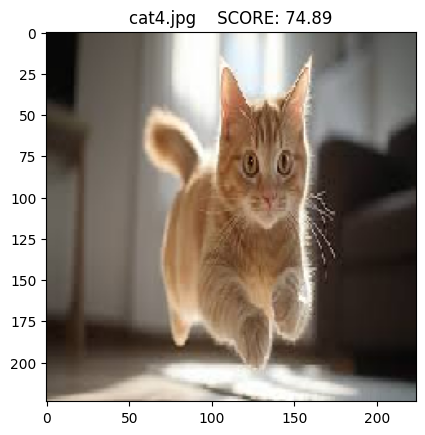

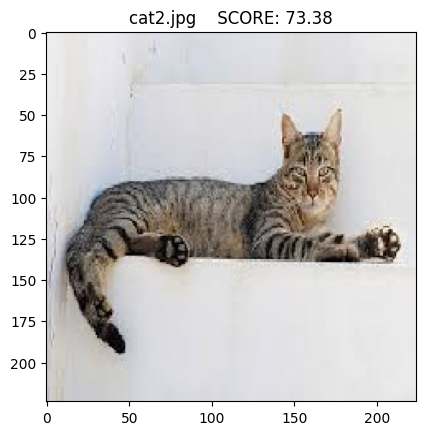

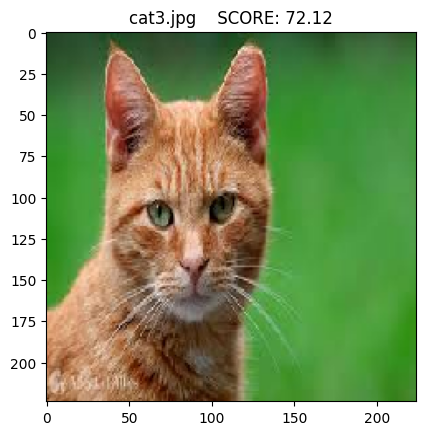

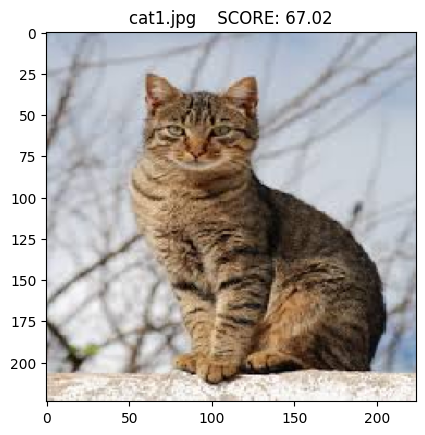

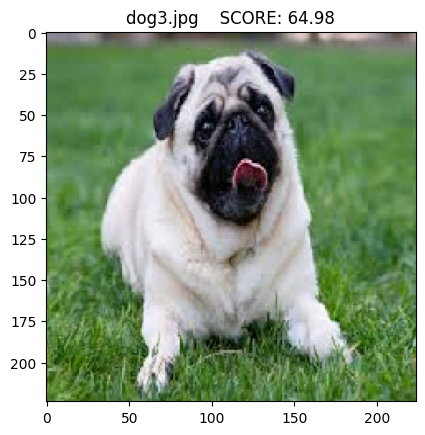

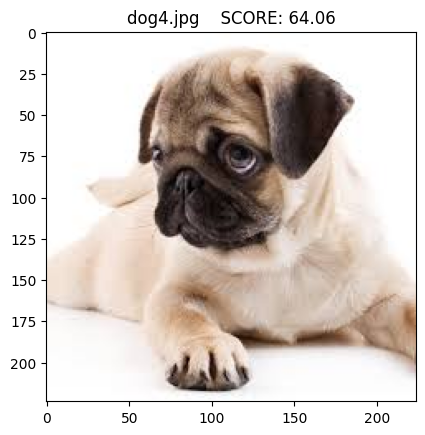

In [79]:
for index,value in enumerate(search_result):
  fig = plt.figure()
  if index == 0:
    plt.title("Query")
  else:
    plt.title(value[0].split('\\')[-1] + f"    SCORE: {(1-(value[2]+1/2))*100:.2f}")
  plt.imshow(load_image(value[0])[0])

d:\Development\LLM\Workshop\env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Development\LLM\Workshop\env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
d:\Development\LLM\Workshop\env\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\krish\AppData\Local\Temp\ipykernel_29084\2450138100.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(umap_result[:, 0], umap_result[:, 1], umap_result[:, 2], c="blue", cmap="viridis", alpha=0.7)


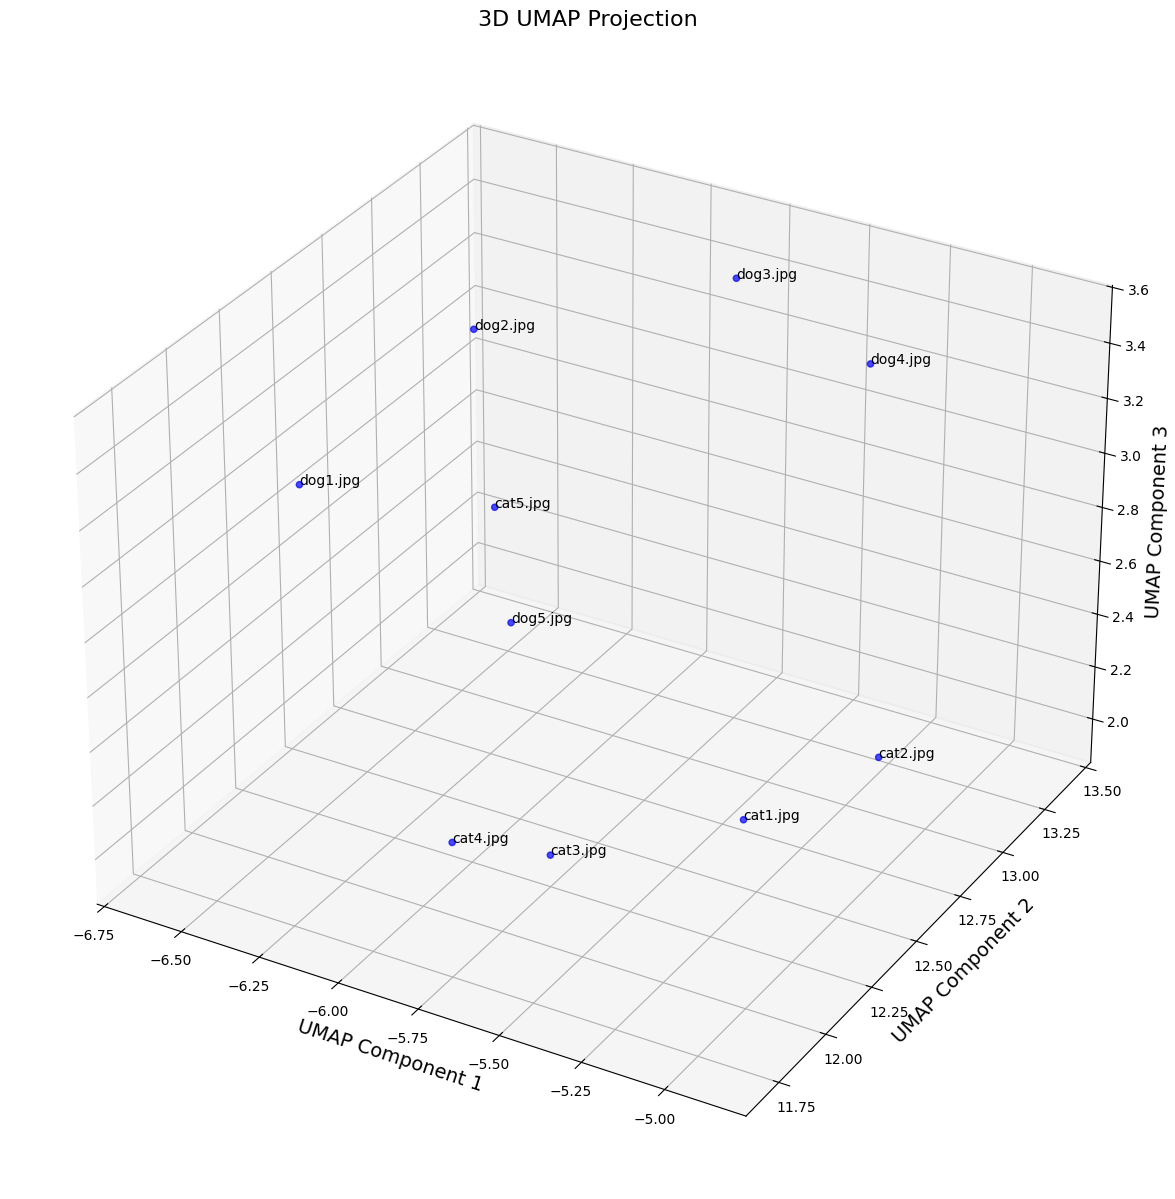

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import umap
import numpy as np

# Create a random NumPy array (for example, 100 samples with 50 features each)
data =  np.array([embedding[1][0] for embedding in embeddings])
labels = os.listdir("images")

# Initialize the UMAP model to reduce the dimensions to 2
umap_model = umap.UMAP(n_components=3, random_state=42)

# Fit and transform the data using UMAP
umap_result = umap_model.fit_transform(data)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3D UMAP result
scatter = ax.scatter(umap_result[:, 0], umap_result[:, 1], umap_result[:, 2], c="blue", cmap="viridis", alpha=0.7)

for i, label in enumerate(labels):
    ax.text(umap_result[i, 0], umap_result[i, 1], umap_result[i, 2], label, fontsize=10)

# Set the title and labels
ax.set_title('3D UMAP Projection', fontsize=16)
ax.set_xlabel('UMAP Component 1', fontsize=14)
ax.set_ylabel('UMAP Component 2', fontsize=14)
ax.set_zlabel('UMAP Component 3', fontsize=14)

plt.ion()

plt.show()
